Análisis de Datos de Energía de Brasil

 Buscarás patrones en datos de consumo y mercado eléctrico, con la posibilidad de optimizar el consumo o incluso "alimentar" un centro de datos con energía barata. Se proporcionan conjuntos de datos de Brasil, con la opción de añadir otros.

# 1. Importamos las librerias necesarias

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline  


In [28]:
# Configuración básica
plt.style.use('default')  # Usamos el estilo default por ahora


# Configuración de visualización

In [1]:
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

NameError: name 'plt' is not defined

# 2. CARGA DE DATOS

In [1]:
print("=== CARGA Y VISTA INICIAL DE DATOS ===")
energy_brasil = pd.read_excel('../datos/energy_brasil.xlsx')
print("\nPrimeras 5 filas del dataset:")
print(energy_brasil.head())

=== CARGA Y VISTA INICIAL DE DATOS ===


NameError: name 'pd' is not defined

# 3. EXPLORACIÓN INICIAL Y LIMPIEZA

In [14]:
print("\n=== INFORMACIÓN DEL DATASET ===")
print(energy_brasil.info())


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285499 entries, 0 to 285498
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data                  285499 non-null  int64  
 1   TipoConsumidor        285499 non-null  object 
 2   Sistema               285499 non-null  object 
 3   UF                    285499 non-null  object 
 4   Setor Econômico - N1  285499 non-null  object 
 5   Setor Econômico - N2  285499 non-null  object 
 6   Setor Econômico - N3  285499 non-null  object 
 7   Tipo Tensão - N1      285499 non-null  object 
 8   Tipo Tensão - N2      285499 non-null  object 
 9   Tipo Tensão - N3      285499 non-null  object 
 10  Faixa de Consumo N1   285499 non-null  object 
 11  Faixa de Consumo N2   285499 non-null  object 
 12  Consumidores          281511 non-null  float64
 13  Consumo               275799 non-null  float64
dtypes: float64(2), int6

# Verificación de valores nulos

In [15]:
print("\nValores nulos por columna:")
print(energy_brasil.isnull().sum())


Valores nulos por columna:
Data                       0
TipoConsumidor             0
Sistema                    0
UF                         0
Setor Econômico - N1       0
Setor Econômico - N2       0
Setor Econômico - N3       0
Tipo Tensão - N1           0
Tipo Tensão - N2           0
Tipo Tensão - N3           0
Faixa de Consumo N1        0
Faixa de Consumo N2        0
Consumidores            3988
Consumo                 9700
dtype: int64


# Conversión de tipos de datos

In [2]:
energy_brasil['date'] = pd.to_datetime(energy_brasil['date'])

NameError: name 'pd' is not defined

# Creación de características temporales

In [3]:
energy_brasil['year'] = energy_brasil['date'].dt.year
energy_brasil['month'] = energy_brasil['date'].dt.month
energy_brasil['day_of_week'] = energy_brasil['date'].dt.dayofweek
energy_brasil['hour'] = energy_brasil['date'].dt.hour

NameError: name 'energy_brasil' is not defined

# 4. ANÁLISIS DESCRIPTIVO

In [19]:
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(energy_brasil.describe())


=== ESTADÍSTICAS DESCRIPTIVAS ===
               Data  Consumidores       Consumo
count  2.854990e+05  2.815110e+05  2.757990e+05
mean   2.018754e+07  3.572126e+04  1.758421e+04
std    2.862986e+04  2.078181e+05  7.510192e+04
min    2.014010e+07 -5.108800e+04 -2.093080e+05
25%    2.016090e+07  9.000000e+00  1.090000e+02
50%    2.019040e+07  1.320000e+02  1.470000e+03
75%    2.021090e+07  3.222000e+03  9.614000e+03
max    2.023120e+07  6.652168e+06  1.850736e+06


# 5. VISUALIZACIONES

# 5.1 Distribución de características individuales

In [4]:
def plot_feature_distribution(data, feature, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribución de {title}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot de {title}')
    plt.tight_layout()
    plt.show()



# Visualizamos distribuciones de las principales variables

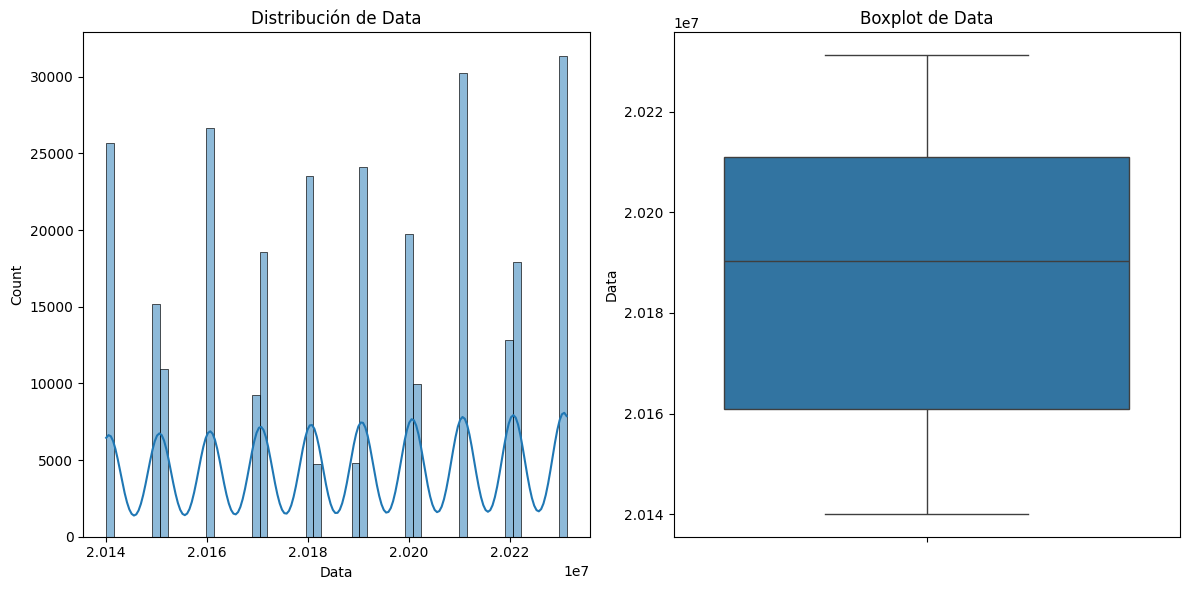

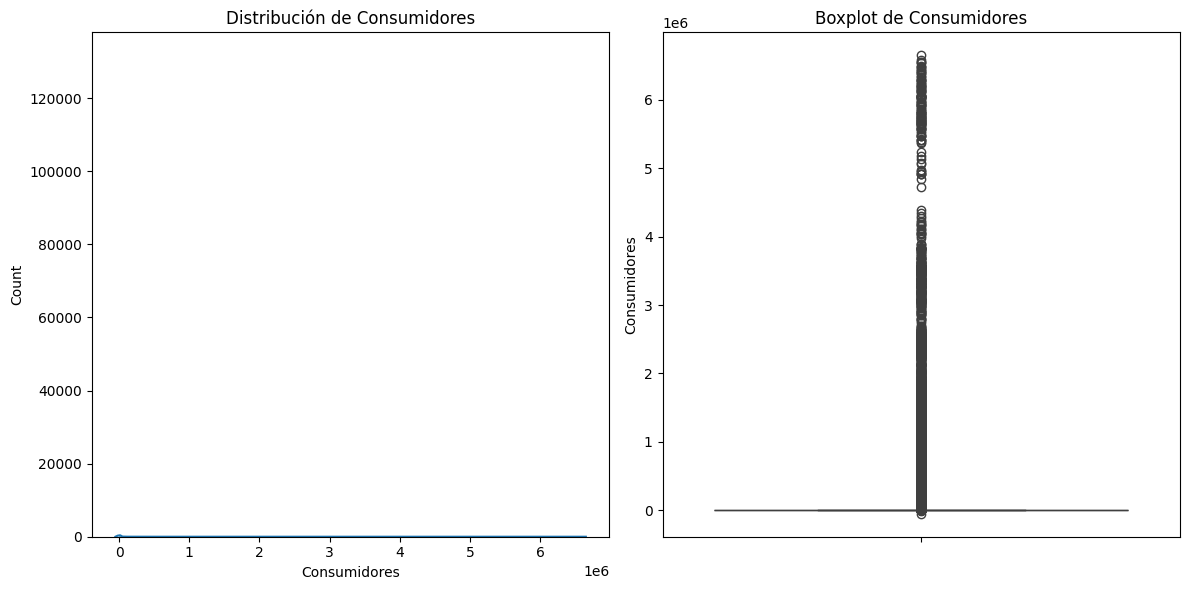

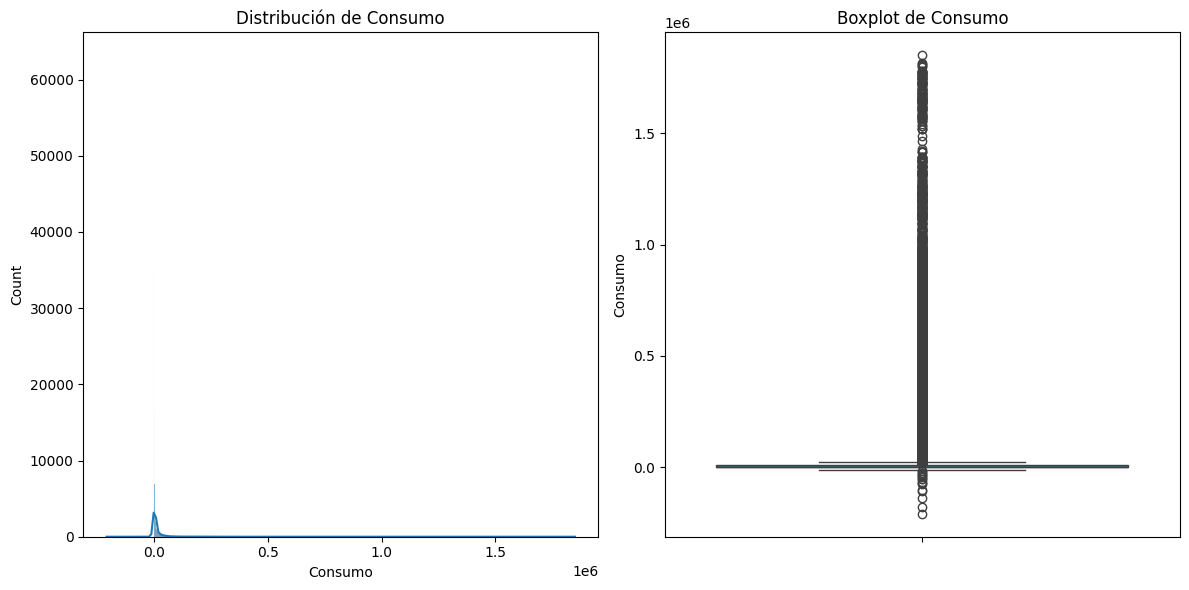

In [38]:
numeric_columns = energy_brasil.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plot_feature_distribution(energy_brasil, col, col)


# 5.2 Análisis de correlaciones

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(energy_brasil.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


NameError: name 'plt' is not defined

# 5.3 Análisis temporal

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(energy_brasil['date'], energy_brasil['consumption'])
plt.title('Consumo de Energía a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

# 5.4 Análisis por períodos

# Consumo promedio por mes

In [7]:
monthly_avg = energy_brasil.groupby('month')['consumption'].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Consumo Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio')
plt.show()

NameError: name 'energy_brasil' is not defined

# 5.5 Patrones semanales

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=energy_brasil, x='day_of_week', y='consumption')
plt.title('Consumo por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Consumo')
plt.show()

NameError: name 'plt' is not defined

# 6. ANÁLISIS AVANZADO

# Tendencias y estacionalidad

In [9]:
energy_brasil['MA7'] = energy_brasil['consumption'].rolling(window=7).mean()
energy_brasil['MA30'] = energy_brasil['consumption'].rolling(window=30).mean()

plt.figure(figsize=(15, 7))
plt.plot(energy_brasil['date'], energy_brasil['consumption'], 
         alpha=0.5, label='Consumo Real')
plt.plot(energy_brasil['date'], energy_brasil['MA7'], 
         label='Media Móvil 7 días')
plt.plot(energy_brasil['date'], energy_brasil['MA30'], 
         label='Media Móvil 30 días')
plt.title('Análisis de Tendencias en el Consumo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()

NameError: name 'energy_brasil' is not defined

# Explicación del código y cómo cumple con los requisitos:
1. Estructura clara del notebook:
-Importación de librerías
-Carga de datos
-Exploración inicial y limpieza
-Análisis descriptivo
-Visualizaciones
-  Análisis avanzado
2. Distribución de características individuales:
-Histogramas con KDE para ver la forma de la distribución
-Boxplots para identificar outliers
-Se aplica a todas las variables numéricas
3. Datos segmentados y filtrados:
-Análisis por mes
-Análisis por día de la semana
-Patrones temporales
4. Correlaciones y Pairplots:
-Matriz de correlación con heatmap
-Valores numéricos para facilitar la interpretación
5. Gráficos potentes:
-Series temporales para tendencias
-Boxplots para distribuciones
-Medias móviles para tendencias suavizadas
# Para explicar los resultados, deberías enfocarte en:
1. Patrones en el consumo de energía
2. Variaciones estacionales
3. Correlaciones importantes
4. Outliers o valores atípicos
5. Tendencias generales